In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

#### PART 1: data explanation and k-means code

**before any coding, let's explain each personality:**
<br></br>
The 16 Myers-Briggs personality types, which categorize individuals based on their preferred energy source (Extraversion (E) or Introversion (I)), information gathering style (Sensing (S) or Intuition (N)), decision-making process (Thinking (T) or Feeling (F)), and lifestyle approach (Judging (J) or Perceiving (P)). 

1. First letter (E or I): Extraversion (E) means drawing energy from interacting with others, while Introversion (I) means gaining energy from alone time.
2. Second letter (S or N): Sensing (S) indicates a preference for concrete details, while Intuition (N) means focusing on patterns and possibilities.
3. Third letter (T or F): Thinking (T) represents making decisions based on logic and analysis, while Feeling (F) involves considering emotions and values.
4. Fourth letter (J or P): Judging (J) indicates a preference for planning and structure, while Perceiving (P) means being more flexible and adaptable. 

The personality types:
1. ENFJ (Extraverted, Intuitive, Feeling, Judging): Charismatic, empathetic leaders who enjoy helping others grow. They are people-focused, intuitive about emotions, and structured in their approach.
2. ENFP (Extraverted, Intuitive, Feeling, Perceiving): Enthusiastic, creative, and imaginative individuals who value authenticity. They are curious, open to new ideas, and prefer flexibility.
3. ENTJ (Extraverted, Intuitive, Thinking, Judging): Assertive, strategic, and goal-oriented leaders who enjoy organizing people and systems. They value efficiency and logic.
4. ENTP (Extraverted, Intuitive, Thinking, Perceiving): Innovative, curious, and argumentative individuals who love exploring ideas and possibilities. They prefer flexibility and adaptability.
5. ESFJ (Extraverted, Sensing, Feeling, Judging): Friendly, practical, and conscientious individuals who value harmony and personal connections. They are organized and reliable.
6. ESFP (Extraverted, Sensing, Feeling, Perceiving): Fun-loving, spontaneous, and outgoing individuals who seek excitement and new experiences. They focus on the present moment and enjoy connecting with others.
7. ESTJ (Extraverted, Sensing, Thinking, Judging): Practical, organized, and decisive individuals who value tradition, structure, and efficiency. They prefer clear rules and authority.
8. ESTP (Extraverted, Sensing, Thinking, Perceiving): Energetic, adventurous, and action-oriented individuals who thrive in the present moment. They are practical and prefer hands-on experiences.
9. INFJ (Introverted, Intuitive, Feeling, Judging): Insightful, empathetic, and idealistic individuals who seek meaning and purpose. They value deep connections and have a strong sense of vision.
10. INFP (Introverted, Intuitive, Feeling, Perceiving): Creative, introspective, and compassionate individuals who are guided by their values. They prefer flexibility and enjoy exploring possibilities.
11. INTJ (Introverted, Intuitive, Thinking, Judging): Strategic, independent, and visionary individuals who focus on long-term goals. They value logic and efficiency and prefer structure.
12. INTP (Introverted, Intuitive, Thinking, Perceiving): Analytical, curious, and open-minded individuals who enjoy exploring abstract concepts and ideas. They prefer flexibility and independent thinking.
13. ISFJ (Introverted, Sensing, Feeling, Judging): Warm, responsible, and practical individuals who value tradition and loyalty. They focus on the details and enjoy helping others.
14. ISFP (Introverted, Sensing, Feeling, Perceiving): Gentle, creative, and spontaneous individuals who value personal freedom. They are sensitive to others' feelings and appreciate beauty and aesthetics.
15. ISTJ (Introverted, Sensing, Thinking, Judging): Detail-oriented, responsible, and dependable individuals who value structure and order. They focus on facts and practicality.
16. ISTP (Introverted, Sensing, Thinking, Perceiving): Independent, resourceful, and adventurous individuals who enjoy problem-solving and hands-on experiences. They are practical and prefer flexibility.


In [4]:
data = pd.read_excel(r"C:\Users\jasmi\INFO371\data\Combined_songs.xlsx")
data

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.487   0.716    5    -6.294     1       0.0348       0.00873   
1              0.560   0.936    3    -5.835     1       0.0439       0.00847   
2              0.494   0.632    5    -6.890     1       0.0342       0.68200   
3              0.574   0.555    6    -6.478     0       0.0357       0.24400   
4              0.537   0.863    7    -4.460     1       0.0446       0.00201   
...              ...     ...  ...       ...   ...          ...           ...   
142549         0.663   0.660    0    -7.802     1       0.0501       0.59600   
142550         0.676   0.747    4    -4.639     0       0.0342       0.17700   
142551         0.363   0.678    2    -4.939     0       0.0995       0.02990   
142552         0.463   0.973    9    -4.069     1       0.1660       0.02300   
142553         0.440   0.983    0    -4.360     1       0.0868       0.22000   

        instrumentalness  liveness  valence    tempo            type  \
0               0.000203    0.1340   0.5940  104.980  audio_features   
1               0.000000    0.1610   0.3710  112.960  audio_features   
2               0.000000    0.0869   0.0797  147.873  audio_features   
3               0.000011    0.2530   0.5720  159.192  audio_features   
4               0.000000    0.2010   0.4840   97.020  audio_features   
...                  ...       ...      ...      ...             ...   
142549          0.001560    0.3310   0.4830  142.009  audio_features   
142550          0.000000    0.2210   0.4490  106.021  audio_features   
142551          0.000000    0.3240   0.3210  162.124  audio_features   
142552          0.080800    0.2800   0.4310  144.076  audio_features   
142553          0.000000    0.2600   0.2030  159.968  audio_features   

                            id                                   uri  \
0       6aBh6vT0UV14DneyyNorR2  spotify:track:6aBh6vT0UV14DneyyNorR2   
1       0GO8y8jQk1PkHzS31d699N  spotify:track:0GO8y8jQk1PkHzS31d699N   
2       6Up545NUflOiXo8cEraH49  spotify:track:6Up545NUflOiXo8cEraH49   
3       3mv8GeRDz9C2XjbwVCRCED  spotify:track:3mv8GeRDz9C2XjbwVCRCED   
4       4DZghpw50ZnO3ckfDuNkft  spotify:track:4DZghpw50ZnO3ckfDuNkft   
...                        ...                                   ...   
142549  6VZXTCIXbgypt0erc2U1Uk  spotify:track:6VZXTCIXbgypt0erc2U1Uk   
142550  6fLKwF2FLBtPNvtrVjYDVz  spotify:track:6fLKwF2FLBtPNvtrVjYDVz   
142551  7HMz8o0m7ASQ3ImFPfhWTY  spotify:track:7HMz8o0m7ASQ3ImFPfhWTY   
142552  1lKZgG6hiw9BhDeXORQpmA  spotify:track:1lKZgG6hiw9BhDeXORQpmA   
142553  5uraJqtCBvLpwt3VeomZdq  spotify:track:5uraJqtCBvLpwt3VeomZdq   

                                               track_href  \
0       https://api.spotify.com/v1/tracks/6aBh6vT0UV14...   
1       https://api.spotify.com/v1/tracks/0GO8y8jQk1Pk...   
2       https://api.spotify.com/v1/tracks/6Up545NUflOi...   
3       https://api.spotify.com/v1/tracks/3mv8GeRDz9C2...   
4       https://api.spotify.com/v1/tracks/4DZghpw50ZnO...   
...                                                   ...   
142549  https://api.spotify.com/v1/tracks/6VZXTCIXbgyp...   
142550  https://api.spotify.com/v1/tracks/6fLKwF2FLBtP...   
142551  https://api.spotify.com/v1/tracks/7HMz8o0m7ASQ...   
142552  https://api.spotify.com/v1/tracks/1lKZgG6hiw9B...   
142553  https://api.spotify.com/v1/tracks/5uraJqtCBvLp...   

                                             analysis_url  duration_ms  \
0       https://api.spotify.com/v1/audio-analysis/6aBh...       163448   
1       https://api.spotify.com/v1/audio-analysis/0GO8...       218013   
2       https://api.spotify.com/v1/audio-analysis/6Up5...       274693   
3       https://api.spotify.com/v1/audio-analysis/3mv8...       208614   
4       https://api.spotify.com/v1/audio-analysis/4DZg...       203587   
...                                                   ...          ...   
142549  https://api.spotify.com/v1/audio-analysis/6VZX...       14

In [5]:
# dropping the unnecessary columns: type, id, uri, track_href, analysis_url, duration_ms, and time_signature (they are mostly
# 4 anyways, so we dont need time_signature):
columns_to_drop = ['type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']
data = data.drop(columns=columns_to_drop)

# verifying
print(data.columns)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'MBTI'],
      dtype='object')


In [6]:
data

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.487   0.716    5    -6.294     1       0.0348       0.00873   
1              0.560   0.936    3    -5.835     1       0.0439       0.00847   
2              0.494   0.632    5    -6.890     1       0.0342       0.68200   
3              0.574   0.555    6    -6.478     0       0.0357       0.24400   
4              0.537   0.863    7    -4.460     1       0.0446       0.00201   
...              ...     ...  ...       ...   ...          ...           ...   
142549         0.663   0.660    0    -7.802     1       0.0501       0.59600   
142550         0.676   0.747    4    -4.639     0       0.0342       0.17700   
142551         0.363   0.678    2    -4.939     0       0.0995       0.02990   
142552         0.463   0.973    9    -4.069     1       0.1660       0.02300   
142553         0.440   0.983    0    -4.360     1       0.0868       0.22000   

        instrumentalness  liveness  valence    tempo  MBTI  
0               0.000203    0.1340   0.5940  104.980  ENFJ  
1               0.000000    0.1610   0.3710  112.960  ENFJ  
2               0.000000    0.0869   0.0797  147.873  ENFJ  
3               0.000011    0.2530   0.5720  159.192  ENFJ  
4               0.000000    0.2010   0.4840   97.020  ENFJ  
...                  ...       ...      ...      ...   ...  
142549          0.001560    0.3310   0.4830  142.009  ISTP  
142550          0.000000    0.2210   0.4490  106.021  ISTP  
142551          0.000000    0.3240   0.3210  162.124  ISTP  
142552          0.080800    0.2800   0.4310  144.076  ISTP  
142553          0.000000    0.2600   0.2030  159.968  ISTP  

[142554 rows x 12 columns]

In [7]:
# since the MBTI column is categorical, we'll convert it into numerical representations, using techniques like one-hot encoding.
# creating new columns for each MBTI letter combination
data['E/I'] = data['MBTI'].apply(lambda x: 'E' if x[0] == 'E' else 'I')
data['S/N'] = data['MBTI'].apply(lambda x: 'S' if x[1] == 'S' else 'N')
data['T/F'] = data['MBTI'].apply(lambda x: 'T' if x[2] == 'T' else 'F')
data['J/P'] = data['MBTI'].apply(lambda x: 'J' if x[3] == 'J' else 'P')
data

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.487   0.716    5    -6.294     1       0.0348       0.00873   
1              0.560   0.936    3    -5.835     1       0.0439       0.00847   
2              0.494   0.632    5    -6.890     1       0.0342       0.68200   
3              0.574   0.555    6    -6.478     0       0.0357       0.24400   
4              0.537   0.863    7    -4.460     1       0.0446       0.00201   
...              ...     ...  ...       ...   ...          ...           ...   
142549         0.663   0.660    0    -7.802     1       0.0501       0.59600   
142550         0.676   0.747    4    -4.639     0       0.0342       0.17700   
142551         0.363   0.678    2    -4.939     0       0.0995       0.02990   
142552         0.463   0.973    9    -4.069     1       0.1660       0.02300   
142553         0.440   0.983    0    -4.360     1       0.0868       0.22000   

        instrumentalness  liveness  valence    tempo  MBTI E/I S/N T/F J/P  
0               0.000203    0.1340   0.5940  104.980  ENFJ   E   N   F   J  
1               0.000000    0.1610   0.3710  112.960  ENFJ   E   N   F   J  
2               0.000000    0.0869   0.0797  147.873  ENFJ   E   N   F   J  
3               0.000011    0.2530   0.5720  159.192  ENFJ   E   N   F   J  
4               0.000000    0.2010   0.4840   97.020  ENFJ   E   N   F   J  
...                  ...       ...      ...      ...   ...  ..  ..  ..  ..  
142549          0.001560    0.3310   0.4830  142.009  ISTP   I   S   T   P  
142550          0.000000    0.2210   0.4490  106.021  ISTP   I   S   T   P  
142551          0.000000    0.3240   0.3210  162.124  ISTP   I   S   T   P  
142552          0.080800    0.2800   0.4310  144.076  ISTP   I   S   T   P  
142553          0.000000    0.2600   0.2030  159.968  ISTP   I   S   T   P  

[142554 rows x 16 columns]

In [8]:
# converting the categorical columns to numeric values in order to use with k means clustering
mbti_mapping = {
    'E': 1, 'I': 0,  # E/I
    'S': 1, 'N': 0,  # S/N
    'T': 1, 'F': 0,  # T/F
    'J': 1, 'P': 0   # J/P
}

data['E/I'] = data['E/I'].map(mbti_mapping)
data['S/N'] = data['S/N'].map(mbti_mapping)
data['T/F'] = data['T/F'].map(mbti_mapping)
data['J/P'] = data['J/P'].map(mbti_mapping)
data

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.487   0.716    5    -6.294     1       0.0348       0.00873   
1              0.560   0.936    3    -5.835     1       0.0439       0.00847   
2              0.494   0.632    5    -6.890     1       0.0342       0.68200   
3              0.574   0.555    6    -6.478     0       0.0357       0.24400   
4              0.537   0.863    7    -4.460     1       0.0446       0.00201   
...              ...     ...  ...       ...   ...          ...           ...   
142549         0.663   0.660    0    -7.802     1       0.0501       0.59600   
142550         0.676   0.747    4    -4.639     0       0.0342       0.17700   
142551         0.363   0.678    2    -4.939     0       0.0995       0.02990   
142552         0.463   0.973    9    -4.069     1       0.1660       0.02300   
142553         0.440   0.983    0    -4.360     1       0.0868       0.22000   

        instrumentalness  liveness  valence    tempo  MBTI  E/I  S/N  T/F  J/P  
0               0.000203    0.1340   0.5940  104.980  ENFJ    1    0    0    1  
1               0.000000    0.1610   0.3710  112.960  ENFJ    1    0    0    1  
2               0.000000    0.0869   0.0797  147.873  ENFJ    1    0    0    1  
3               0.000011    0.2530   0.5720  159.192  ENFJ    1    0    0    1  
4               0.000000    0.2010   0.4840   97.020  ENFJ    1    0    0    1  
...                  ...       ...      ...      ...   ...  ...  ...  ...  ...  
142549          0.001560    0.3310   0.4830  142.009  ISTP    0    1    1    0  
142550          0.000000    0.2210   0.4490  106.021  ISTP    0    1    1    0  
142551          0.000000    0.3240   0.3210  162.124  ISTP    0    1    1    0  
142552          0.080800    0.2800   0.4310  144.076  ISTP    0    1    1    0  
142553          0.000000    0.2600   0.2030  159.968  ISTP    0    1    1    0  

[142554 rows x 16 columns]

In [9]:
# creating X: 
# selecting relevant features for clustering (all but MBTI)
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'valence', 'tempo', 'E/I', 'S/N', 'T/F', 'J/P']

X = data[features]
X

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.487   0.716    5    -6.294     1       0.0348       0.00873   
1              0.560   0.936    3    -5.835     1       0.0439       0.00847   
2              0.494   0.632    5    -6.890     1       0.0342       0.68200   
3              0.574   0.555    6    -6.478     0       0.0357       0.24400   
4              0.537   0.863    7    -4.460     1       0.0446       0.00201   
...              ...     ...  ...       ...   ...          ...           ...   
142549         0.663   0.660    0    -7.802     1       0.0501       0.59600   
142550         0.676   0.747    4    -4.639     0       0.0342       0.17700   
142551         0.363   0.678    2    -4.939     0       0.0995       0.02990   
142552         0.463   0.973    9    -4.069     1       0.1660       0.02300   
142553         0.440   0.983    0    -4.360     1       0.0868       0.22000   

        instrumentalness  liveness  valence    tempo  E/I  S/N  T/F  J/P  
0               0.000203    0.1340   0.5940  104.980    1    0    0    1  
1               0.000000    0.1610   0.3710  112.960    1    0    0    1  
2               0.000000    0.0869   0.0797  147.873    1    0    0    1  
3               0.000011    0.2530   0.5720  159.192    1    0    0    1  
4               0.000000    0.2010   0.4840   97.020    1    0    0    1  
...                  ...       ...      ...      ...  ...  ...  ...  ...  
142549          0.001560    0.3310   0.4830  142.009    0    1    1    0  
142550          0.000000    0.2210   0.4490  106.021    0    1    1    0  
142551          0.000000    0.3240   0.3210  162.124    0    1    1    0  
142552          0.080800    0.2800   0.4310  144.076    0    1    1    0  
142553          0.000000    0.2600   0.2030  159.968    0    1    1    0  

[142554 rows x 15 columns]

In [10]:
# scaling the features. scaling ensures that each feature has an equal opportunity to influence the clustering process and helps K-means 
# produce more meaningful and interpretable results.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

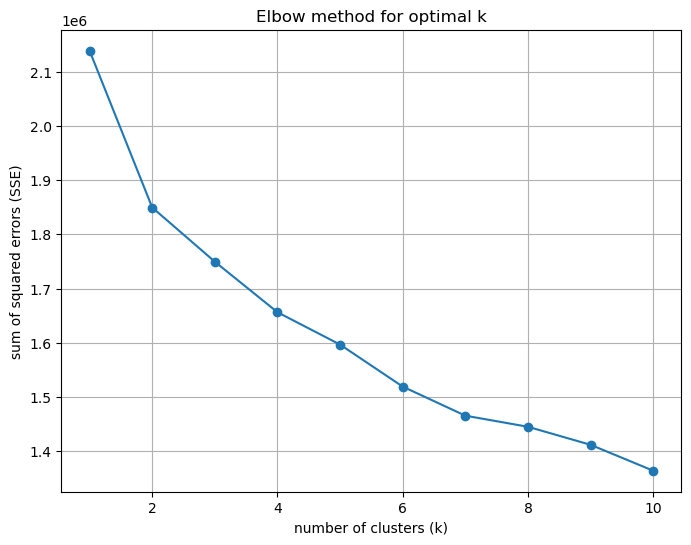

In [11]:
# elbow Method to find the optimal number of clusters (k)
# also plot the sum of squared distances for different k values

sse = []  # list to store sum of squared errors for different k values
k_range = range(1, 11)  # trying k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  # inertia is the sum of squared distances

# elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow method for optimal k')
plt.xlabel('number of clusters (k)')
plt.ylabel('sum of squared errors (SSE)')
plt.grid(True)
plt.show()

In [12]:
# optimal k
optimal_k = 2

# fitting
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=0)

In [13]:
# adding the cluster labels to the data frame
data['cluster'] = kmeans.labels_
data

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.487   0.716    5    -6.294     1       0.0348       0.00873   
1              0.560   0.936    3    -5.835     1       0.0439       0.00847   
2              0.494   0.632    5    -6.890     1       0.0342       0.68200   
3              0.574   0.555    6    -6.478     0       0.0357       0.24400   
4              0.537   0.863    7    -4.460     1       0.0446       0.00201   
...              ...     ...  ...       ...   ...          ...           ...   
142549         0.663   0.660    0    -7.802     1       0.0501       0.59600   
142550         0.676   0.747    4    -4.639     0       0.0342       0.17700   
142551         0.363   0.678    2    -4.939     0       0.0995       0.02990   
142552         0.463   0.973    9    -4.069     1       0.1660       0.02300   
142553         0.440   0.983    0    -4.360     1       0.0868       0.22000   

        instrumentalness  liveness  valence    tempo  MBTI  E/I  S/N  T/F  \
0               0.000203    0.1340   0.5940  104.980  ENFJ    1    0    0   
1               0.000000    0.1610   0.3710  112.960  ENFJ    1    0    0   
2               0.000000    0.0869   0.0797  147.873  ENFJ    1    0    0   
3               0.000011    0.2530   0.5720  159.192  ENFJ    1    0    0   
4               0.000000    0.2010   0.4840   97.020  ENFJ    1    0    0   
...                  ...       ...      ...      ...   ...  ...  ...  ...   
142549          0.001560    0.3310   0.4830  142.009  ISTP    0    1    1   
142550          0.000000    0.2210   0.4490  106.021  ISTP    0    1    1   
142551          0.000000    0.3240   0.3210  162.124  ISTP    0    1    1   
142552          0.080800    0.2800   0.4310  144.076  ISTP    0    1    1   
142553          0.000000    0.2600   0.2030  159.968  ISTP    0    1    1   

        J/P  cluster  
0         1        0  
1         1        0  
2         1        1  
3         1        0  
4         1        0  
...     ...      ...  
142549    0        0  
142550    0        0  
142551    0        0  
142552    0        0  
142553    0        0  

[142554 rows x 17 columns]

#### PART 2: answering some research questions

In [73]:
# analyzing the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # inverse transform the cluster centers to the original scale
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)  # create a dataframe with the updated features list
print('cluster centers:')
cluster_centers_df

cluster centers:


danceability    energy       key   loudness      mode  speechiness  \
0      0.628331  0.727855  5.366428  -5.893946  0.574323     0.094392   
1      0.513800  0.366938  5.057359 -11.365520  0.704775     0.055013   

   acousticness  instrumentalness  liveness   valence       tempo       E/I  \
0      0.136663          0.048689  0.195699  0.542108  124.737474  0.537412   
1      0.621355          0.185541  0.149103  0.296555  114.053580  0.323463   

        S/N       T/F       J/P  
0  0.425834  0.521178  0.415731  
1  0.363001  0.386582  0.521865

- **cluster 0**: has high energy, high danceability, and low loudness, which can reflect energetic pop or dance music. the moderate valence indicates that this cluster may have happy or upbeat tracks. the higher values for E/I and T/F suggest that individuals in this cluster are more extraverted and emotionally driven in their music preferences.
- **cluster 1**: has high valence and low energy, which can reflect calm, relaxing music or classical tunes. the higher acousticness and lower energy, loudness, and tempo suggest that this cluster represents more mellow, acoustic, or laid-back music. the lower valence reflects a more somber or relaxed mood. the lower E/I value suggests that individuals in this cluster might prefer introspective, calm music that aligns with introverted and emotionally sensitive traits.

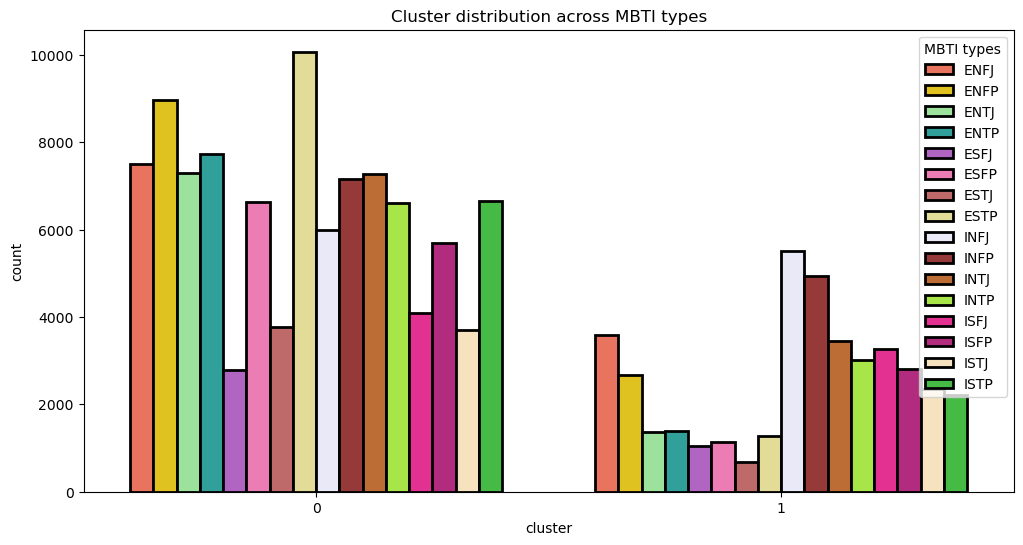

In [17]:
# analyzing the MBTI types in each cluster:
# doing so by checking how many individuals from each MBTI type fall into each cluster. 
# this will show if certain clusters align with specific personality traits.
mbti_cluster_counts = data.groupby(['cluster', 'MBTI']).size().unstack(fill_value=0)
mbti_cluster_counts

# color palatte to give a distinct color for each MBTI type
palette = ['#FF6347', '#FFD700', '#90EE90', '#20B2AA', '#BA55D3', '#FF69B4', '#CD5C5C', '#F0E68C', 
           '#E6E6FA', '#A52A2A', '#D2691E', '#ADFF2F', '#FF1493', '#C71585', '#FFE4B5', '#32CD32']

# visualizing the cluster distributions across MBTI types
plt.figure(figsize=(12, 6))
sns.countplot(x='cluster', hue='MBTI', data=data, linewidth=2, edgecolor='black', palette=palette)
plt.title('Cluster distribution across MBTI types')
plt.xlabel('cluster')
plt.ylabel('count')
plt.legend(title='MBTI types', loc='upper right')
plt.show()

**The bar graph shows the distribution of individuals from each MBTI type across the clusters:**
- The bar graph shows the count of individuals of each MBTI type in each cluster, letting us directly associate personality types with clusters.
- This plot visualizes the distribution of MBTI types across the different clusters created by the music features (energy, danceability, etc.).

**cluster 0 (energetic, extraverted, positive mood):**

- ENFJ, ENFP, ENTJ, ENTP: these types dominate cluster 0, with ENFJ and ENFP being represented much more. these individuals tend to be energetic, outgoing, and people-oriented, which aligns with the characteristics of cluster 0 (high energy, upbeat, positive mood).
- ESFJ, ESFP, ESTJ, ESTP: these types are also well-represented in this cluster, confirming that cluster 1 corresponds to individuals who are more sociable and likely to enjoy energetic, danceable music.
- while introverts like INFJ, INFP, and INTJ are present, their numbers are much lower in cluster 1. introverted individuals prefer calmer music and might be more likely to fall into cluster 0.

**cluster 1 (relaxing, introverted, calmer mood):**
- the introverted types INFJ, INFP, and INTJ are more heavily represented in this cluster, which aligns with the calmer, more acoustic-focused music characterized by this cluster.
- ISFJ, ISFP, and ISTJ are also represented in this cluster, indicating that more reflective, introspective types gravitate toward music with a lower energy, more acoustic, and emotional quality.
- extraverts still appear in cluster 1, but in much smaller numbers compared to cluster 0. ESFJ, ESFP, and ESTJ have a moderate presence, but it's clear that they are less likely to fall into this cluster, which suggests they prefer higher-energy music.

**summary:**
- Extraverts (E): extraverted individuals, particularly ENFJ, ENFP, ENTJ, and ENTP, are more likely to enjoy energetic, danceable, and upbeat music. These types are significantly more present in cluster 0, which has higher energy, danceability, and tempo. This suggests that Extraverts might gravitate toward music that is high-energy and social, supporting their need for stimulation and excitement.
- Introverts (I): introverted individuals, especially INFJ, INFP, and INTJ, are more likely to enjoy calmer, more introspective, or acoustic-based music. These types are overrepresented in cluster 1, which has lower energy, more acoustic characteristics, and slower tempos. This suggests that Introverts tend to prefer music that is less loud and more reflective, aligning with their typically more introspective and reserved nature.
- Feeling Types (F): feeling types like ENFJ, ESFJ, INFP, and INFJ are common in both clusters. ENFJ and ESFJ (both feeling types, and extraverted) are more prevalent in cluster 0 (higher energy, more outgoing music), and INFP and INFJ (feeling types, introverted) are more prevalent in cluster 1 (calmer, less energetic music). feeling types might be drawn to music that resonates with their emotions, whether it's energetic or calming.
- Judging vs. Perceiving (J/P): there's a somewhat even distribution of Judging and Perceiving types across both clusters, but Perceiving types (like ENFP, INFP, ISFP, ESTP) are generally more common in cluster 1, which aligns with their preference for flexibility and variety. Judging types (like ESTJ, ISTJ, ESFJ) are more in cluster 0, showing that they have a preference for more structured and stable music that fits their organized lifestyle.

#### PART 3:

**Following the professor's comment after our presentation: "Clustering results are interesting but why not group by each axis of the MBTI when clustering instead of looking at the 4 letter grouping? It'll provide more leverage":**

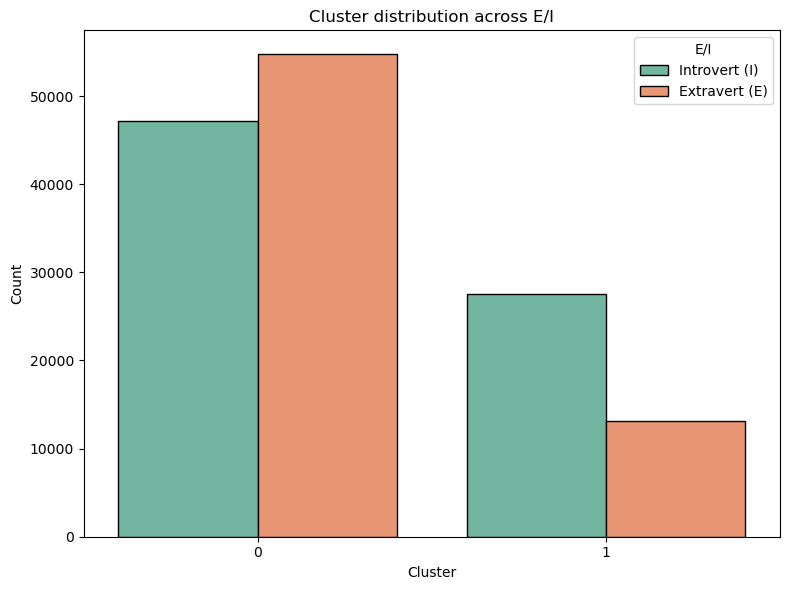

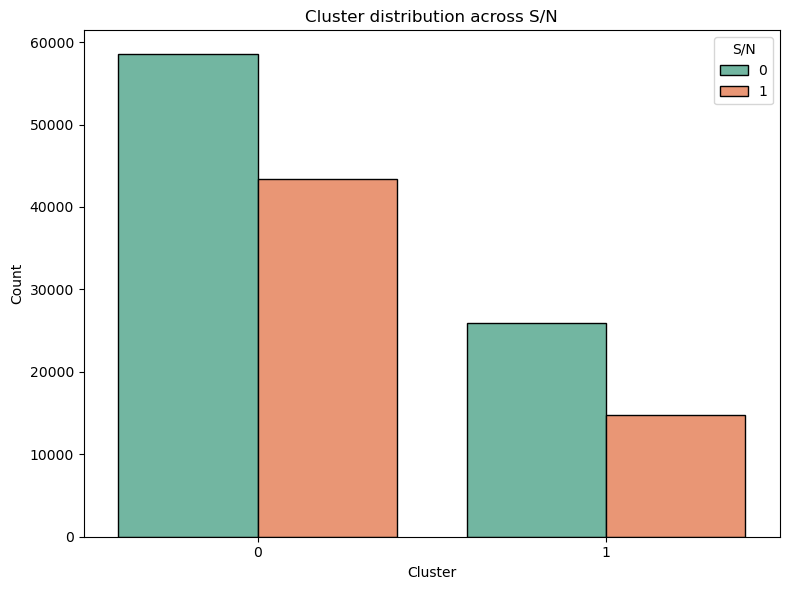

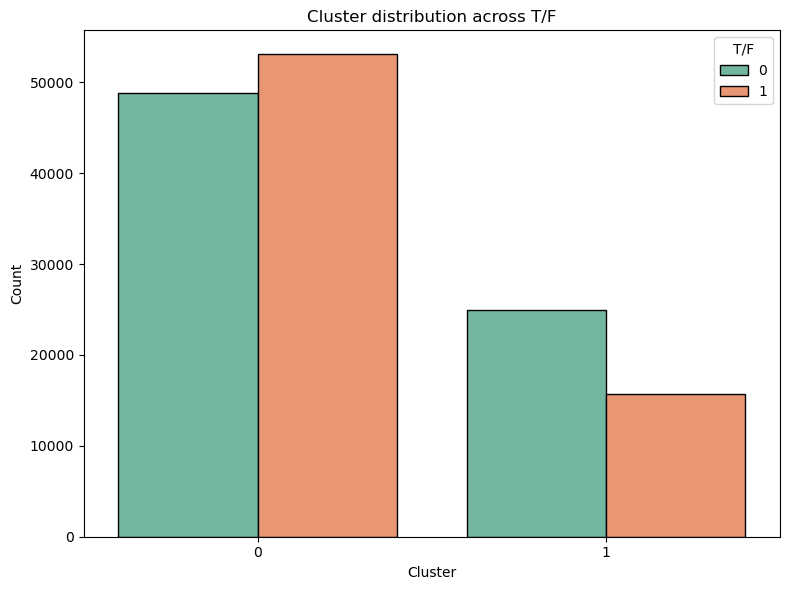

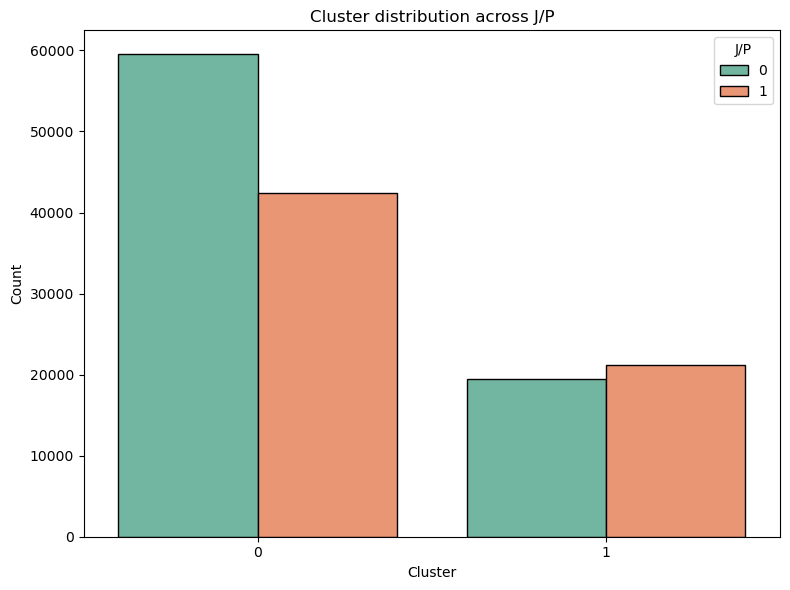

In [65]:
# visualizing how each cluster is distributed across the four MBTI axes created:
axes = ['E/I', 'S/N', 'T/F', 'J/P']

for axis in axes:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='cluster', hue=axis, data=data, palette='Set2', edgecolor='black')
    plt.title(f'Cluster distribution across {axis}')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=axis, labels=['Introvert (I)', 'Extravert (E)'] if axis == 'E/I' else None)
    plt.tight_layout()
    plt.show()

In [75]:
# analyzing how each MBTI axis is associated with specific music features by examining the cluster centers:
selected_features = ['danceability', 'energy', 'key', 'acousticness', 'valence', 'tempo', 'speechiness', 'E/I', 'S/N', 'T/F', 'J/P']
cluster_centers_df = cluster_centers_df[selected_features]

print('Cluster centers (key features & MBTI axes): \n', cluster_centers_df)

Cluster centers (key features & MBTI axes): 
    danceability    energy       key  acousticness   valence       tempo  \
0      0.628331  0.727855  5.366428      0.136663  0.542108  124.737474   
1      0.513800  0.366938  5.057359      0.621355  0.296555  114.053580   

   speechiness       E/I       S/N       T/F       J/P  
0     0.094392  0.537412  0.425834  0.521178  0.415731  
1     0.055013  0.323463  0.363001  0.386582  0.521865  


In [77]:
# quantifying the relationship between MBTI axes and musical keys or clusters:

# cross-tabulation for axes and clusters
for axis in axes:
    crosstab = pd.crosstab(data[axis], data['cluster'])
    print(f'Cross-tabulation for {axis} and clusters:')
    print(crosstab)

Cross-tabulation for E/I and clusters:
cluster      0      1
E/I                  
0        47141  27531
1        54724  13158
Cross-tabulation for S/N and clusters:
cluster      0      1
S/N                  
0        58498  25915
1        43367  14774
Cross-tabulation for T/F and clusters:
cluster      0      1
T/F                  
0        48787  24962
1        53078  15727
Cross-tabulation for J/P and clusters:
cluster      0      1
J/P                  
0        59505  19455
1        42360  21234


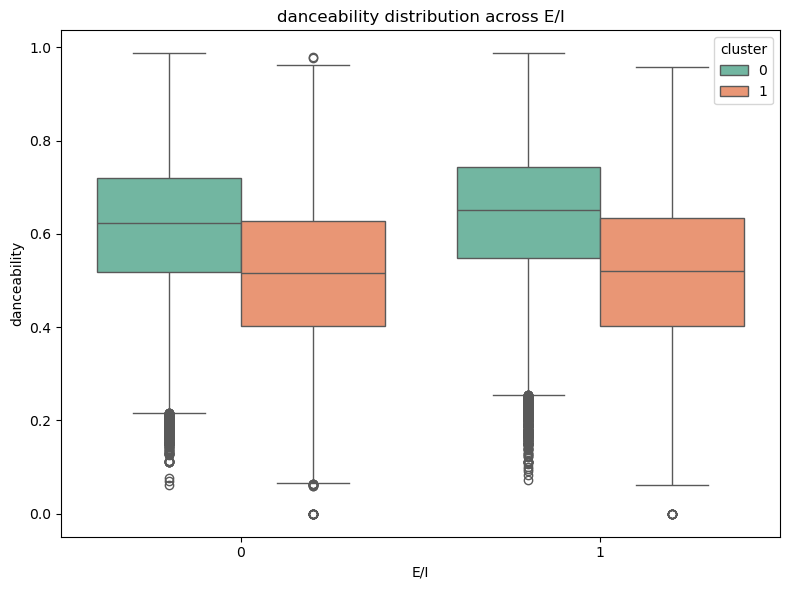

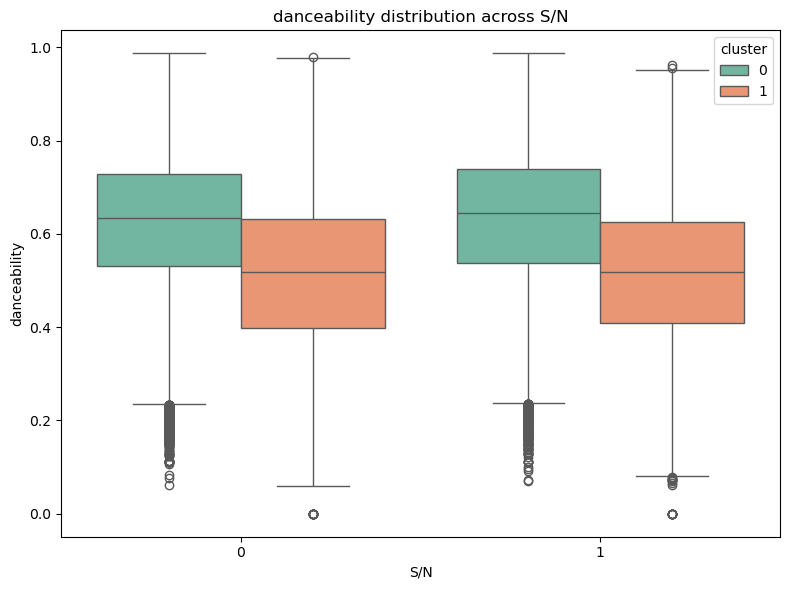

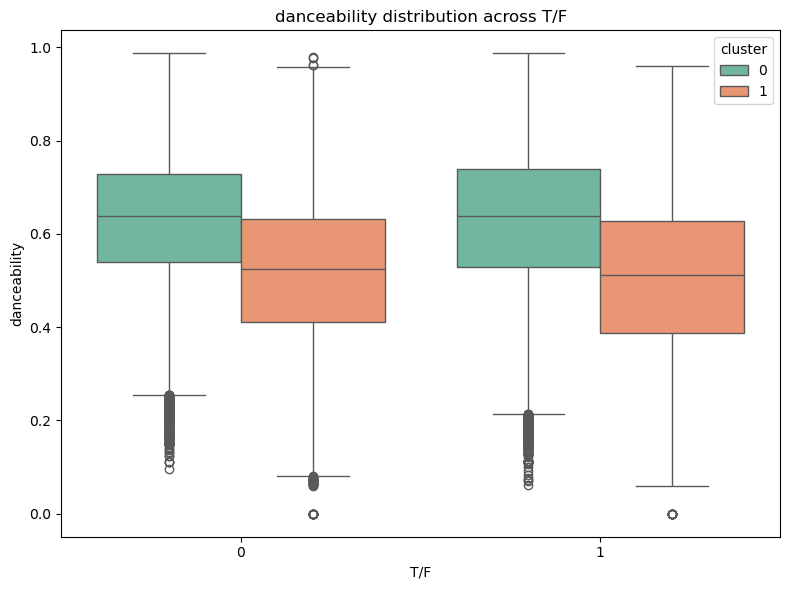

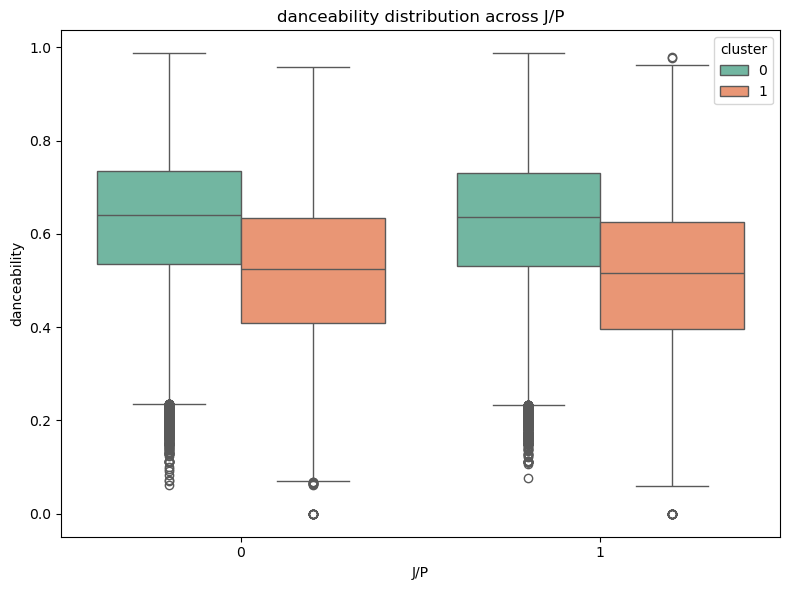

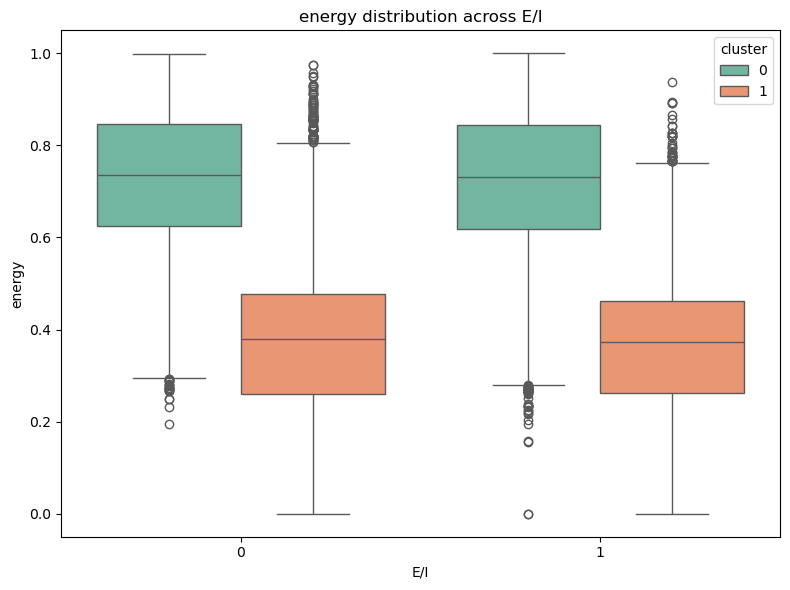

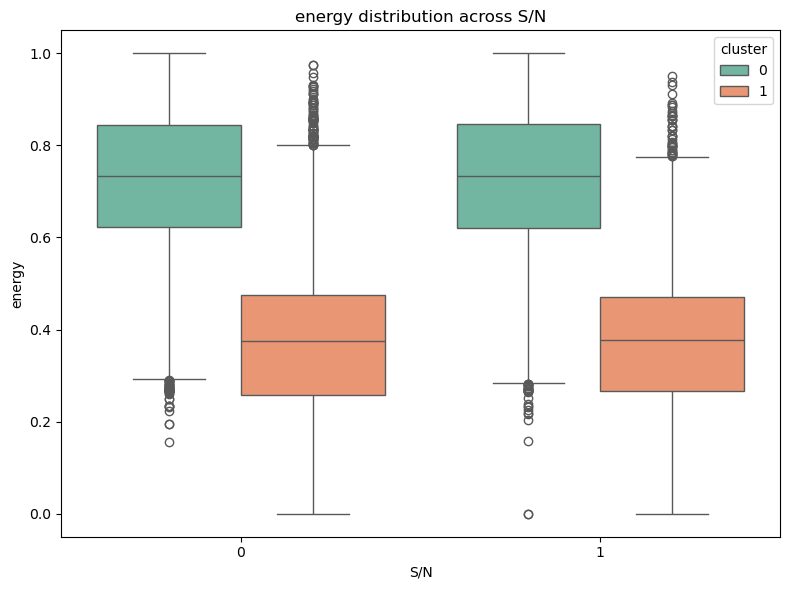

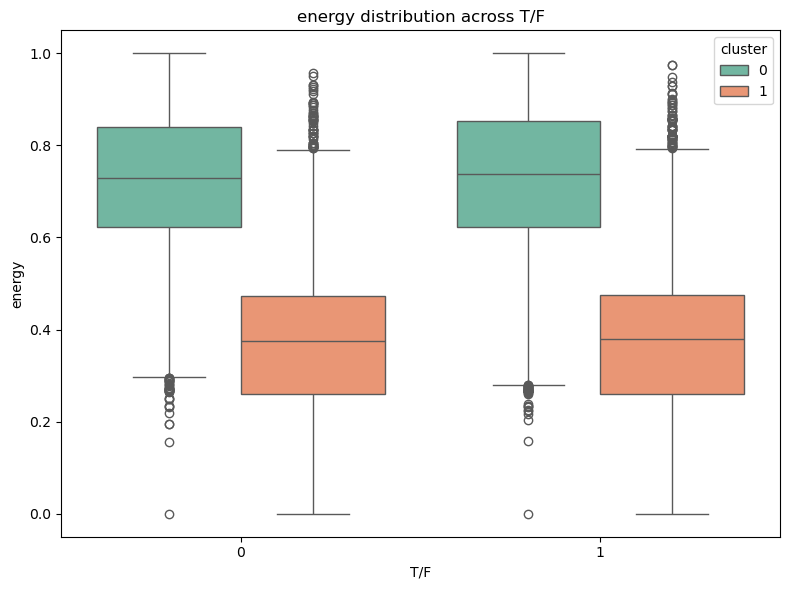

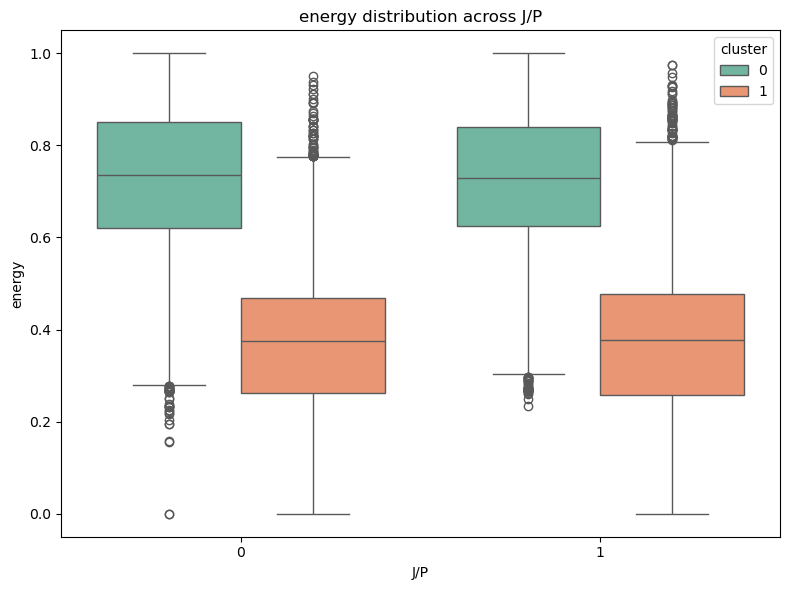

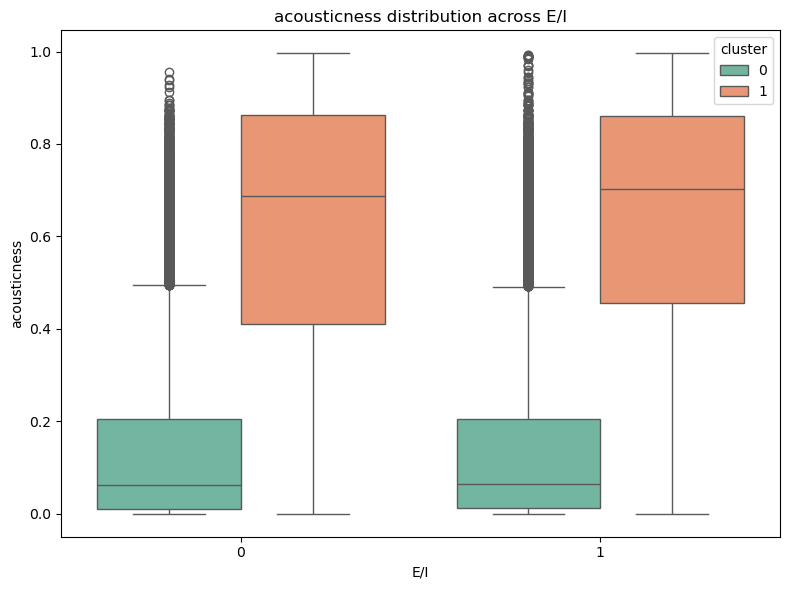

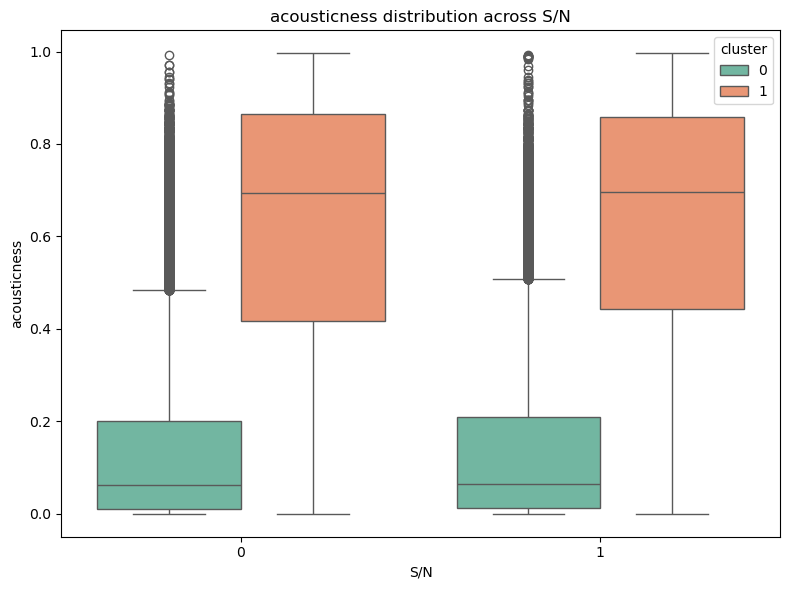

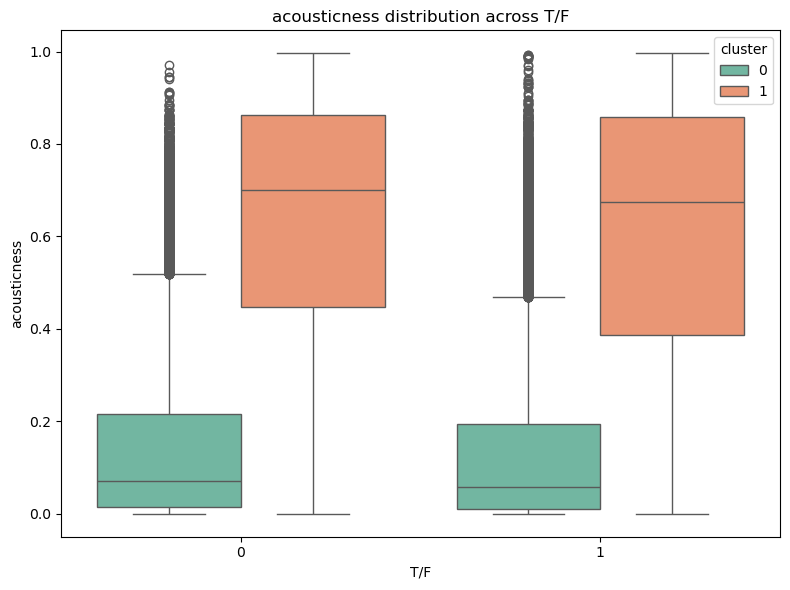

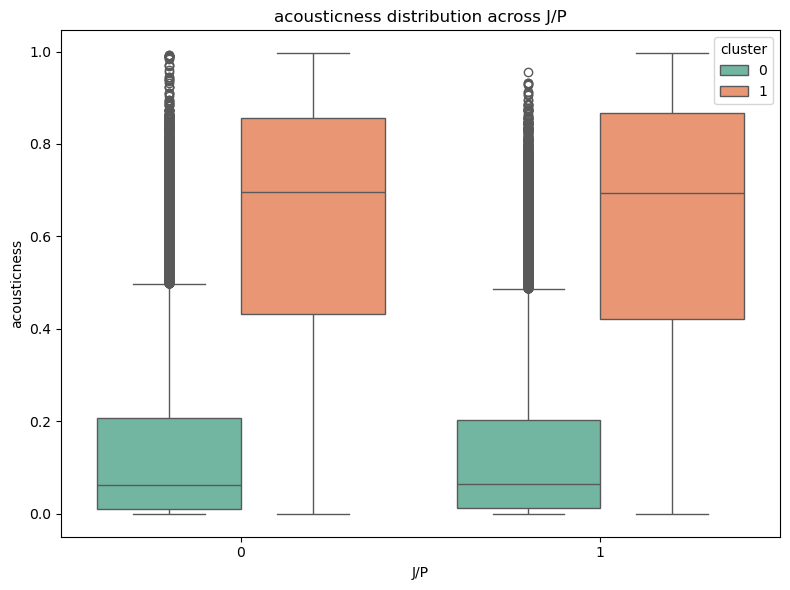

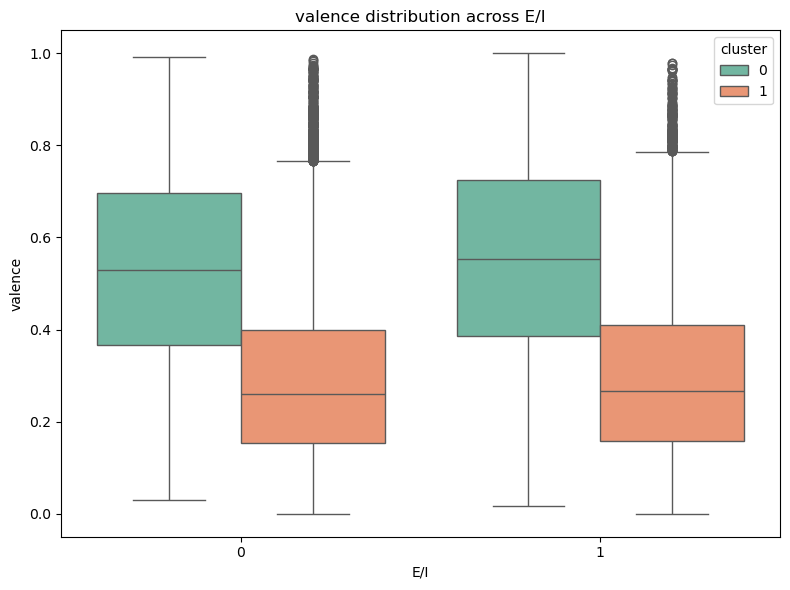

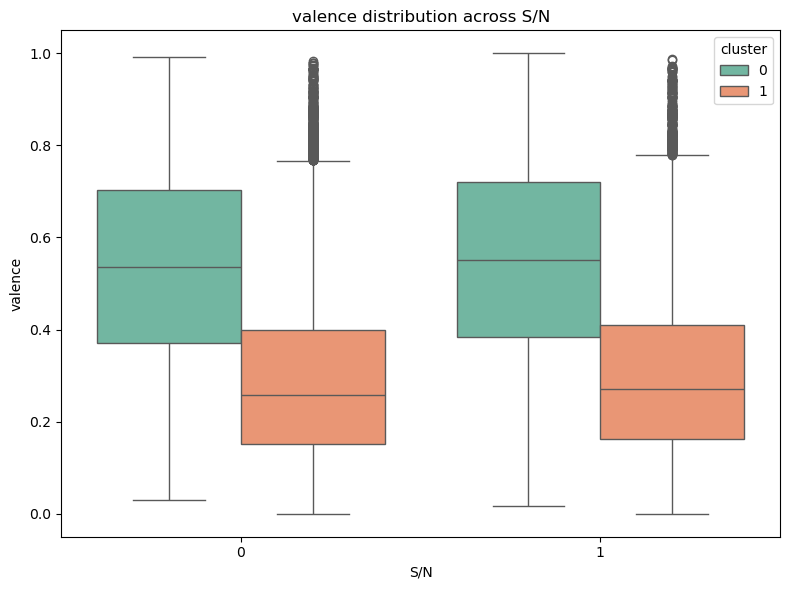

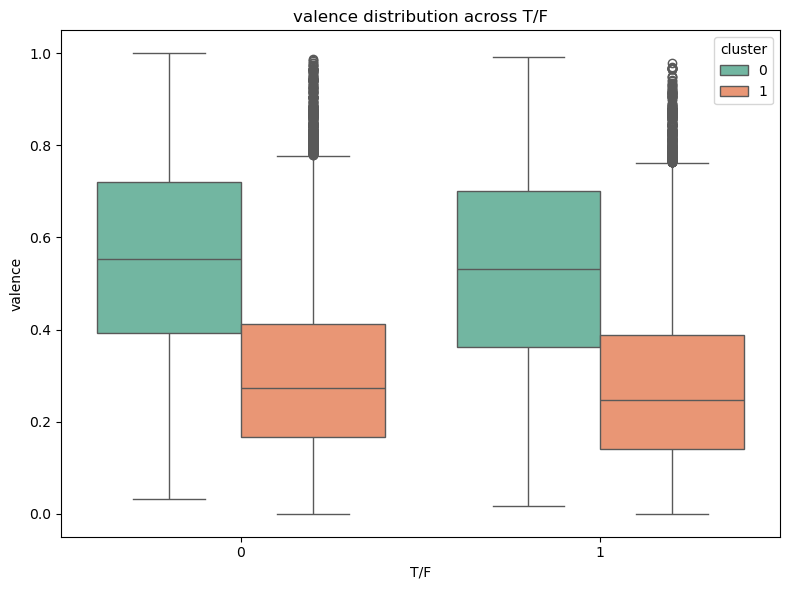

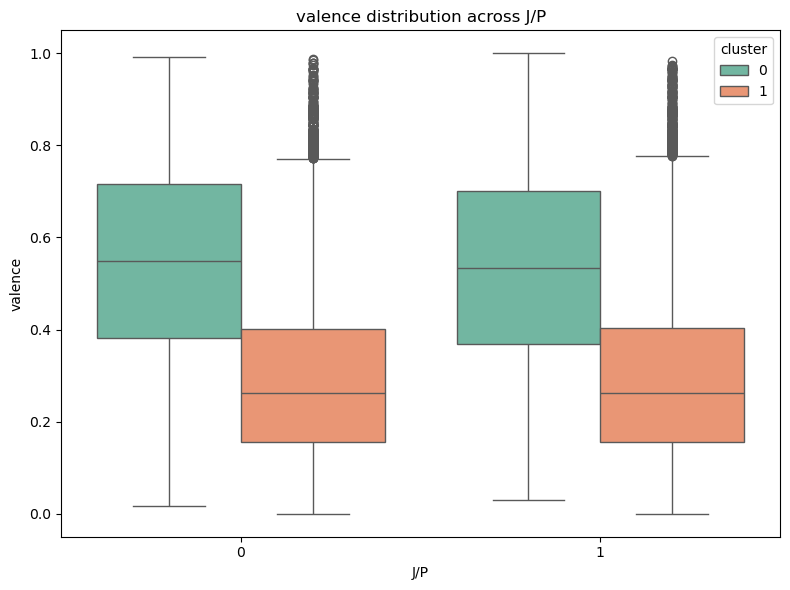

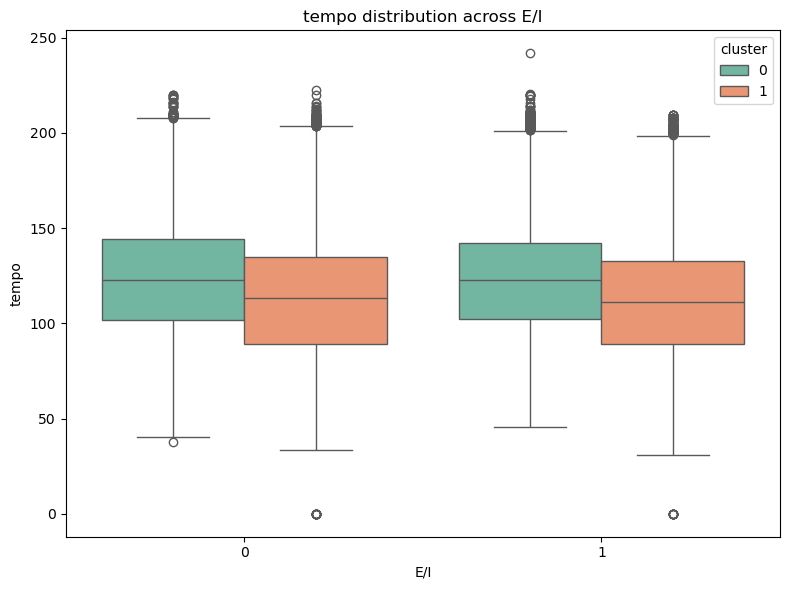

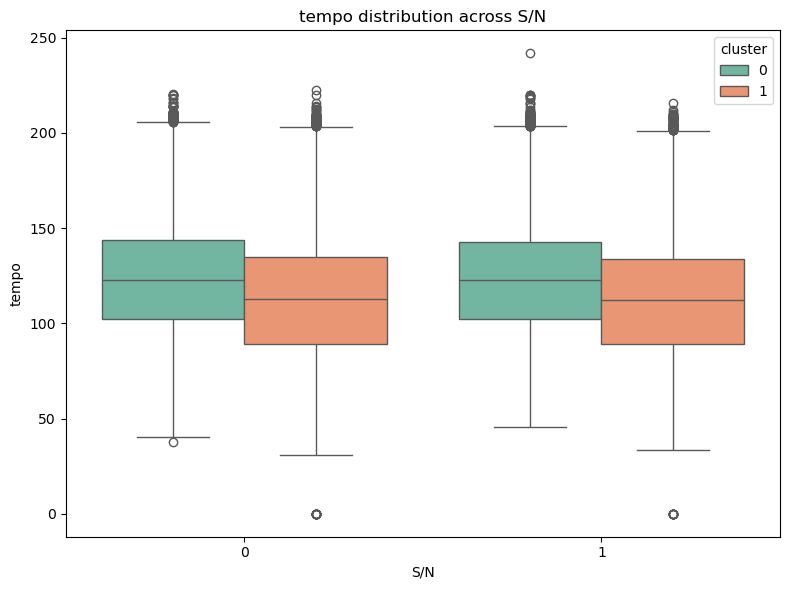

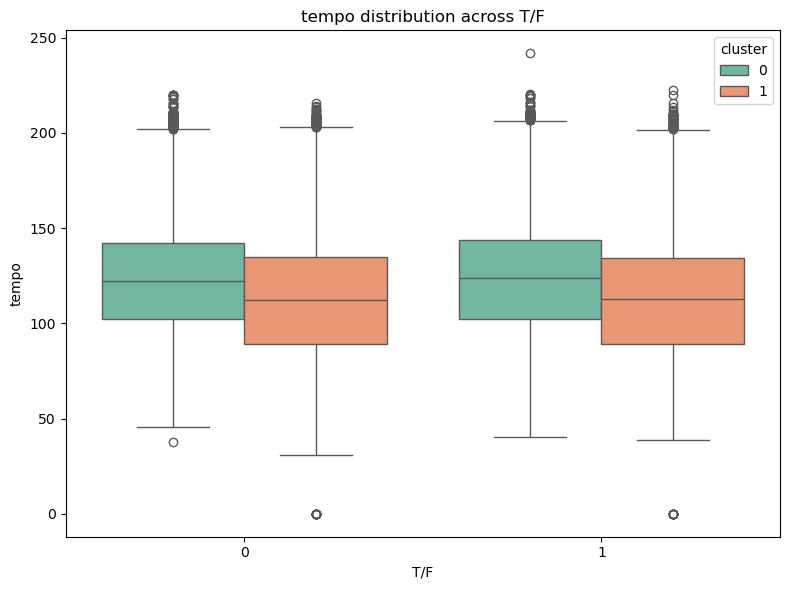

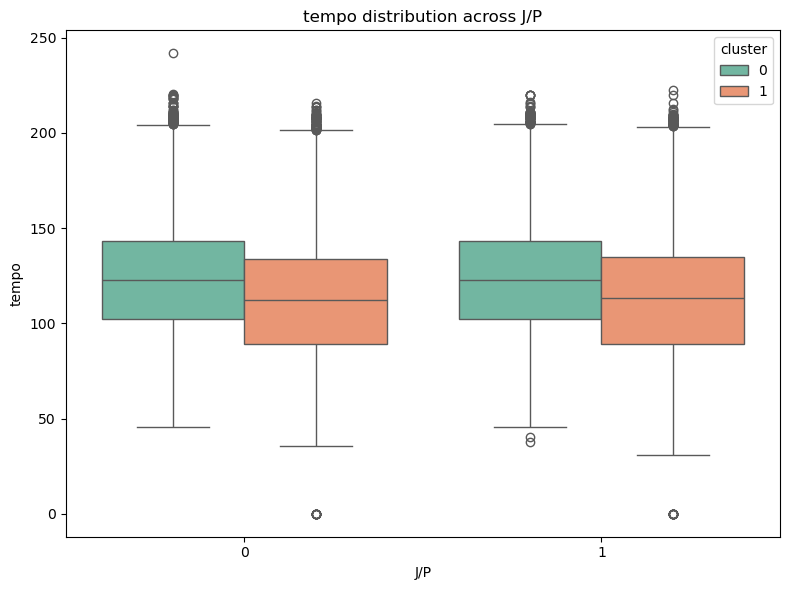

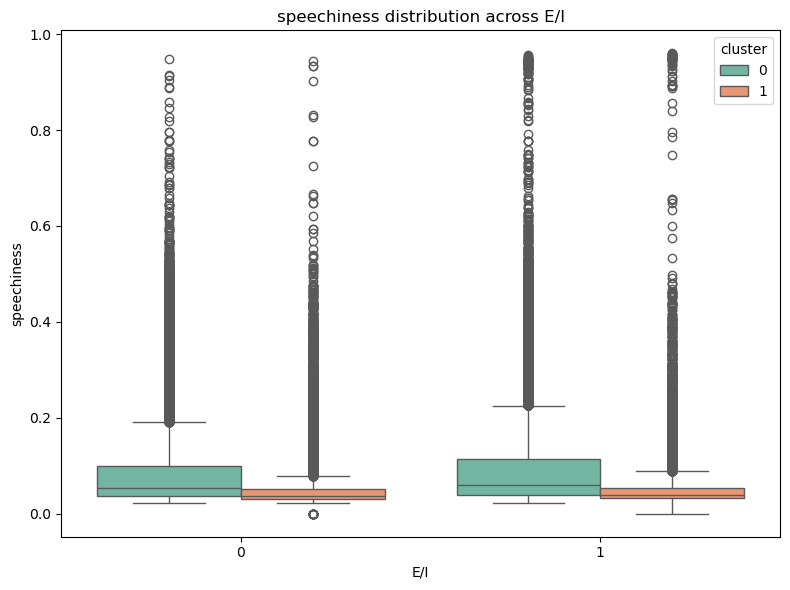

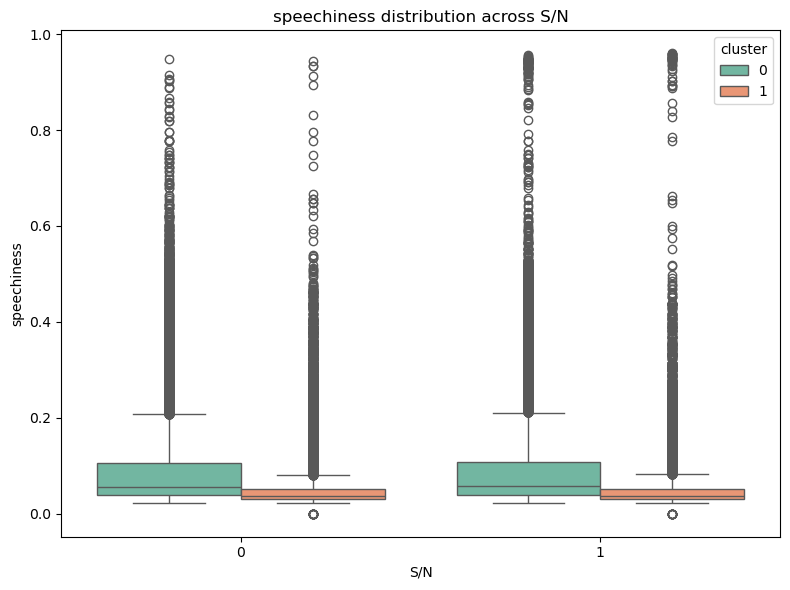

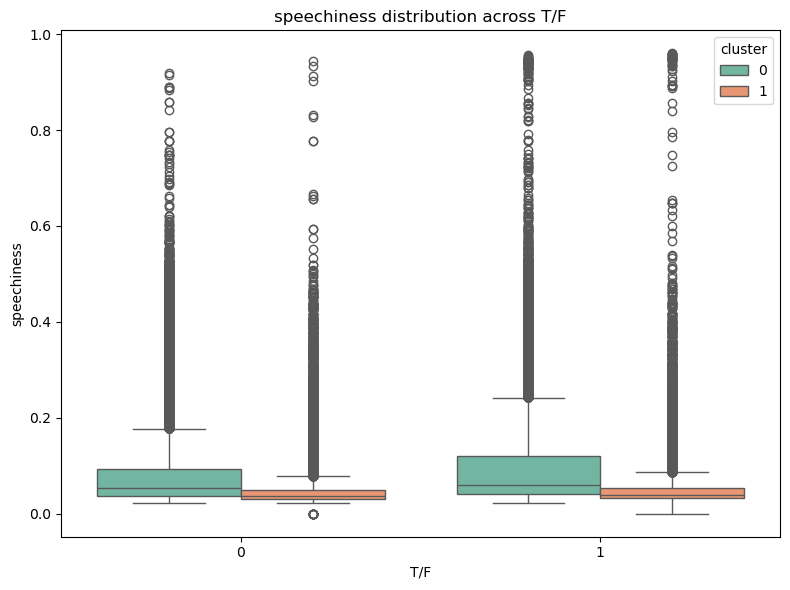

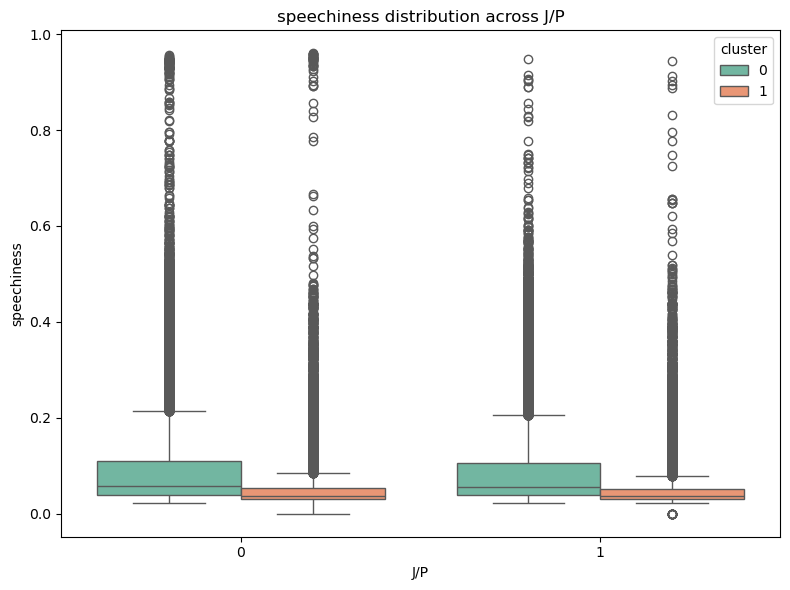

In [90]:
# analyzing the distributions of specific music features across MBTI axes:
features_to_plot = ['danceability', 'energy', 'acousticness', 'valence', 'tempo', 'speechiness']

for feature in features_to_plot:
    for axis in axes:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=axis, y=feature, data=data, hue='cluster', palette='Set2')
        plt.title(f'{feature} distribution across {axis}')
        plt.xlabel(axis)
        plt.ylabel(feature)
        plt.tight_layout()
        plt.show()

1. Cluster distribution across the 4 MBTI axes:
- What the code does: It visualizes how each cluster (1 or 2) is distributed across the MBTI axes: E/I, S/N, T/F, and J/P. It uses bar graphs or countplots to compare the representation of each one of the axes categories (like E vs I, for example) in the clusters.
- Results:
    - E/I (extraversion vs introversion): Cluster 0 contains more introverts (I), cluster 1: contains more extraverts (E). Introverts prefer the musical features in cluster 0 like higher acousticness and lower energy, while extraverts align with cluster 1 features like higher energy and danceability.
    - S/N (sensing vs intuition): Cluster 0 is dominated by intuitive (N) types, while cluster 1is dominated by sensing (S) types. Intuitive types (N)  prefer music in cluster 0 which includes more reflective and complex tracks, while sensing types (S) prefer the music in cluster 1 which includes liveliness and simpler tracks.
    - T/F (thinking vs feeling): Cluster 0 includes more thinkers (T), cluster 1 includes more feelers (F). Thinkers (T) prefer the calmer and more instrumental music in cluster 0, while feelers (F) prefer the music in cluster 1 which has more emotional and energetic tracks, and that resonates with their values and feelings.
    - J/P (judging vs perceiving): Cluster 0 is dominated by judging (J) types, while cluster 1 displays a more balanced distribution between judging (J) and perceiving (P) types. Judging (J) types enjoy the structured and even more predictable characteristics of music in cluster 0, while perceiving (P) types who prefer flexibility and variety, are more equally distributed but show a slight preference for cluster 1 due to its more varied music features.


2. Cluster Centers:
- What the Code Does: It displays the cluster centers for selected features, including danceability, energy, key, acousticness, valence, and the MBTI axes.
- Results:
    - Cluster 0: Higher acousticness (0.62), higer speechiness (0.09), lower energy (0.36), and lower valence (0.29). More associated with introverts, intuitives, and thinkers.
    - Cluster 1: Higher energy (0.72), higher valence (0.54), higher danceability (0.62), and lower speechiness (0.06). More associated with extraverts, sensors, and feelers.

3. Cross-Tabulation for MBTI Axes
- What the Code Does: It creates tables that show how each MBTI axes maps to the 2 clusters.
- Results:
    - E/I: Introverts (I) has 47,141 in cluster 0 vs 27,531 in cluster 1. Extraverts (E) has 54,724 in cluster 0 vs 13,158 in cluster 1. Introverts prefer music in cluster 0 which is more reflective, while extraverts dominate cluster 1, which includes more energetic tracks.
    - S/N: Intuitive types favor cluster 0, while sensing types favor cluster 1.
    - T/F: Thinkers dominate cluster 0, feelers dominate cluster 1.
    - J/P: Judging types are more present in cluster 0, while perceivers balance across both clusters.

4. Feature Distributions Across MBTI Axes
- What the Code Does: It uses boxplots to show how music features are distributed across the MBTI axes and clusters.
- Results:
    - E/I: Extraverts have higher energy, higher valence, higher danceability, and lower speechiness, while introverts have higher acousticness, higher speechiness, and lower energy.
    - S/N: Sensing have higher tempo, higher danceability, and lower speechiness, while intuitive have higher acousticness and speechiness.
    - T/F: Thinkers prefer reflective music (lower valence, higher acousticness, and higher speechiness), and feelers prefer more emotional and energetic music (higher valence and energy).
    - J/P: Judging have higher preference for structured music (lower tempo and higher speechiness), while perceiving enjoy more varied tempos.

#### PART 4:

- The pairplots, violin plots, and histograms below are written to further strengthen some findings of the most relevant features that were found by Mai. This code is just extra practice, it isn't part of my (Jasmine's) work!
- The violin plots visualize how different features relate to each other and differentiate the two clusters, which further reveals how different MBTI types prefer certain features in music. The Histograms show how the distribution of each music feature differences between clusters, further clarifying their different preferences. The pair-plots show how the clusters relate to each other.

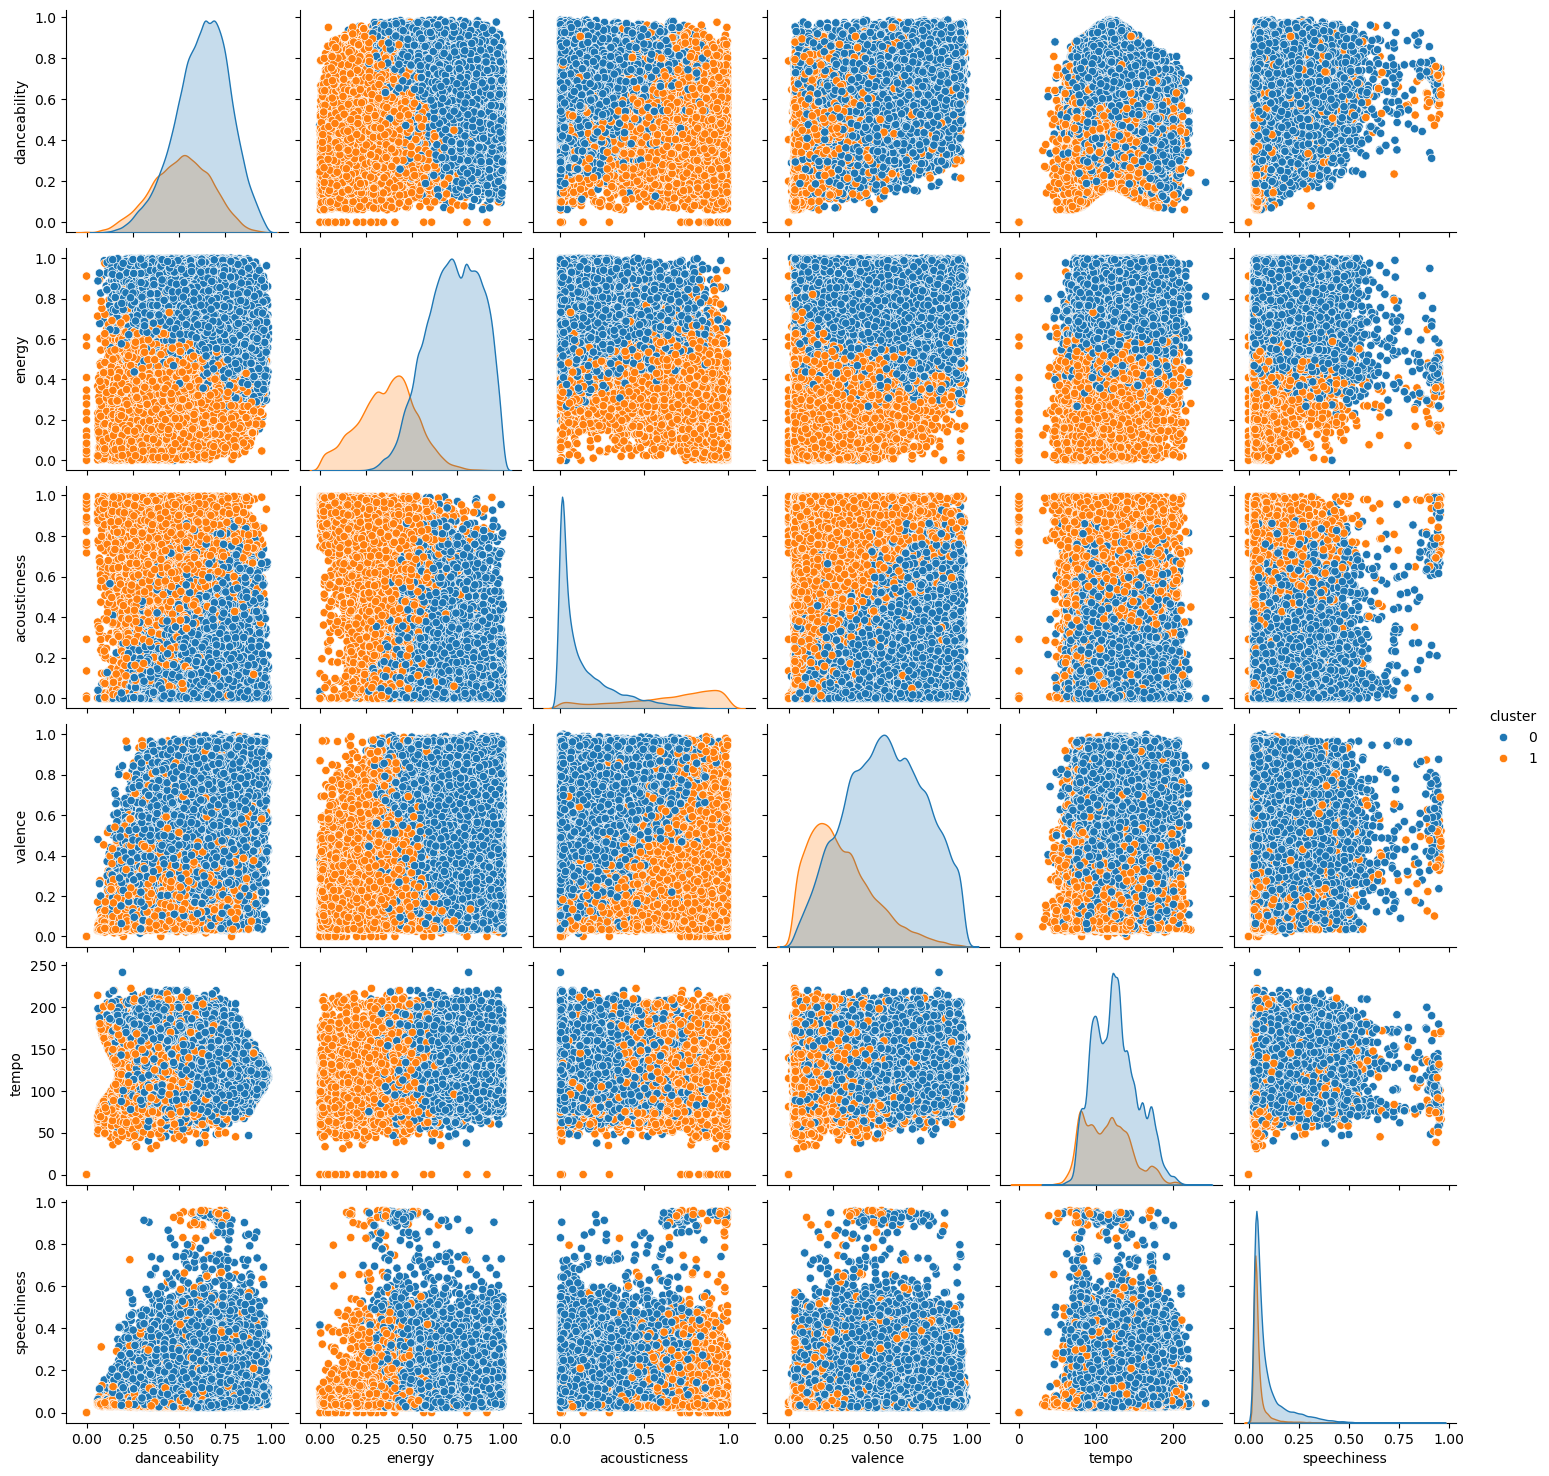

In [29]:
# visualizing the clusters, using a pairplot to see how the clusters relate to each other
sns.pairplot(data, hue='cluster', vars=features_to_plot)
plt.show()

- A pairplot shows pairwise relationships between selected features (energy, danceability, loudness, ect) and colors the points by cluster.
- This allows you to see how different music features are distributed across clusters and whether there are obvious distinctions.

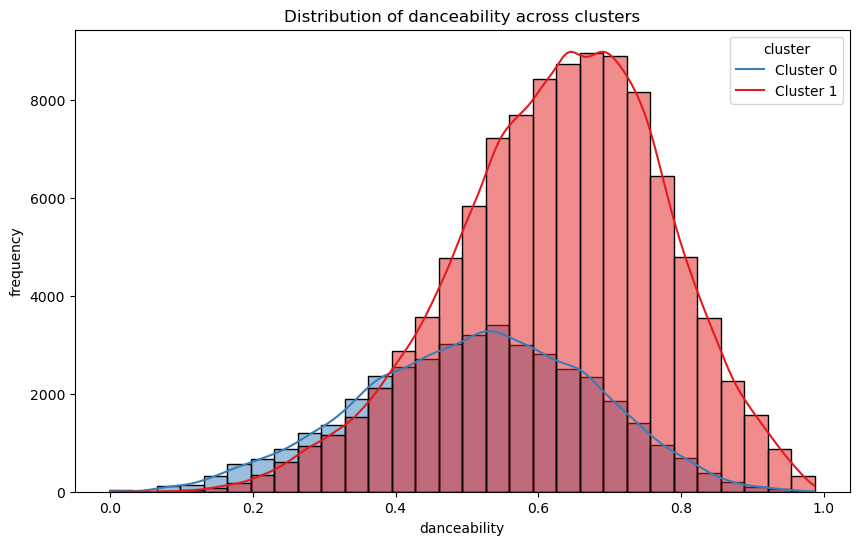

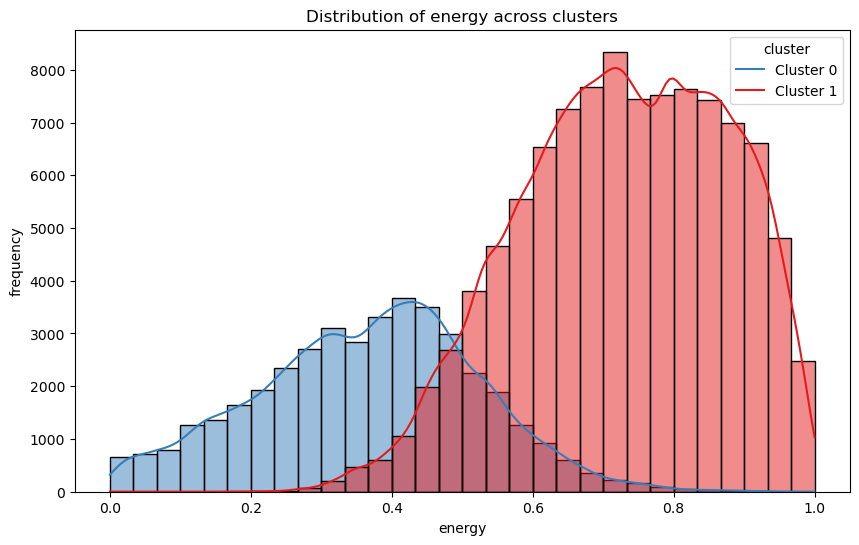

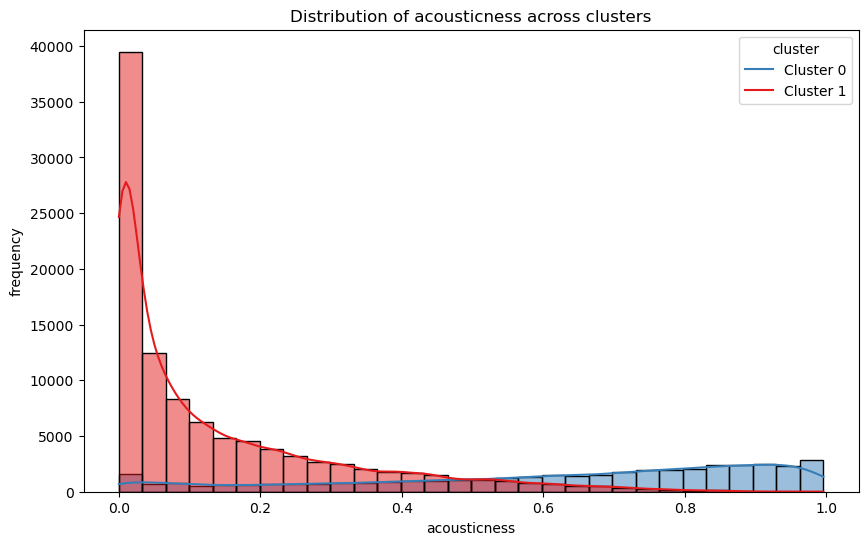

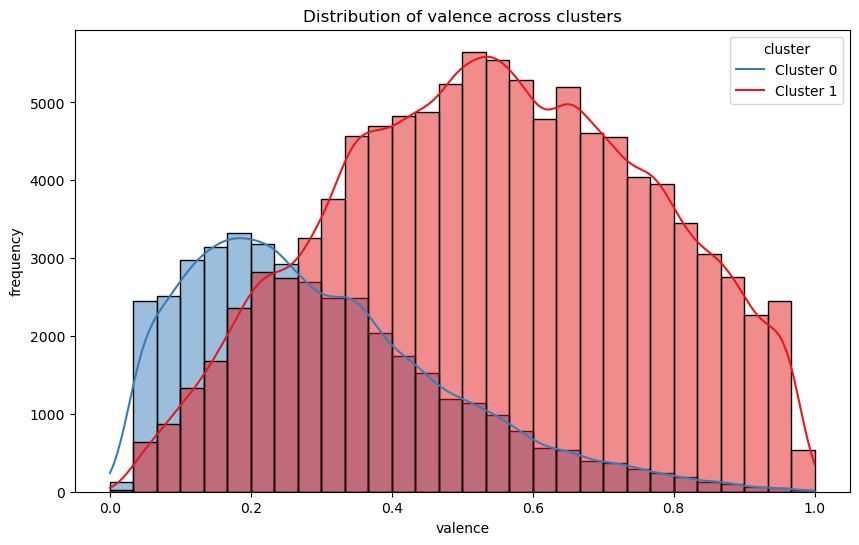

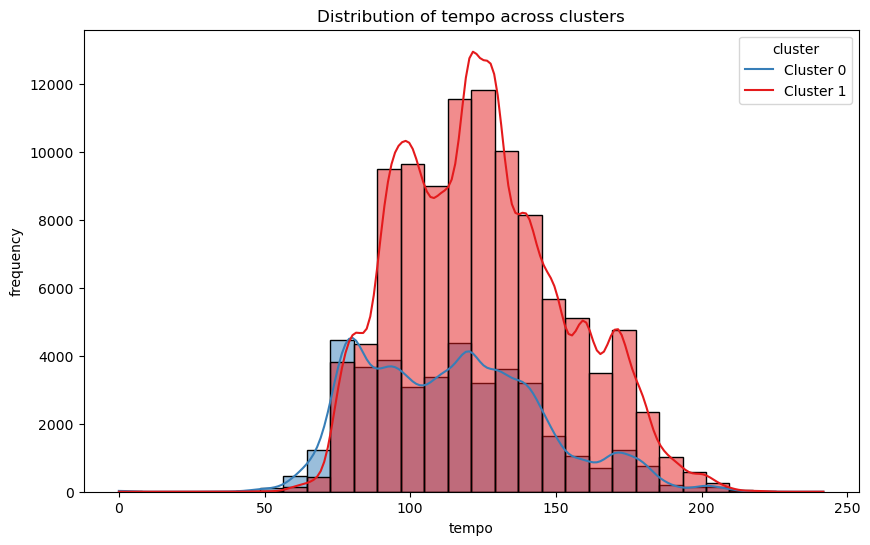

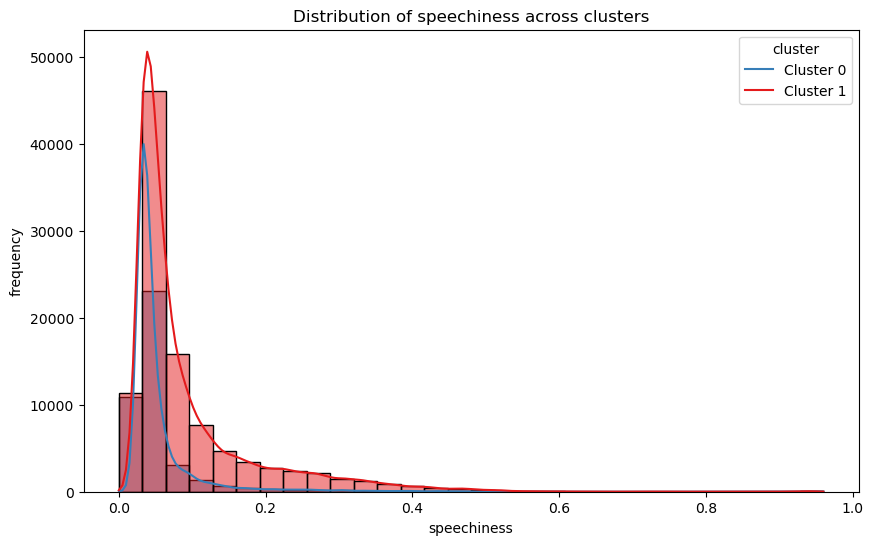

In [31]:
# histograms for each feature (comparing the distributions of each feature across the different clusters)
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    # generating a histogram with 
    # kde: helps to visualize the distribution of data points in a more smoother and continuous form
    ax = sns.histplot(data=data, x=feature, hue='cluster', kde=True, bins=30, palette='Set1')
    plt.title(f'Distribution of {feature} across clusters')
    plt.xlabel(feature)
    plt.ylabel('frequency')
    # using ax.get_legend() to get legend that is automatically generated
    ax.legend(title='cluster', loc='upper right', labels=[f'Cluster {i}' for i in range(data['cluster'].nunique())])
    plt.show()

# overall, these plots help understand the distribution of music features across the clusters 
# and give insights to how personality traits might influence preferences for certain types of music.

#### PART 5:
Code to answer the third part of the research question "if personality traits affect preferences for music of different keys and modes since these elements can shape individual listening experiences" below:

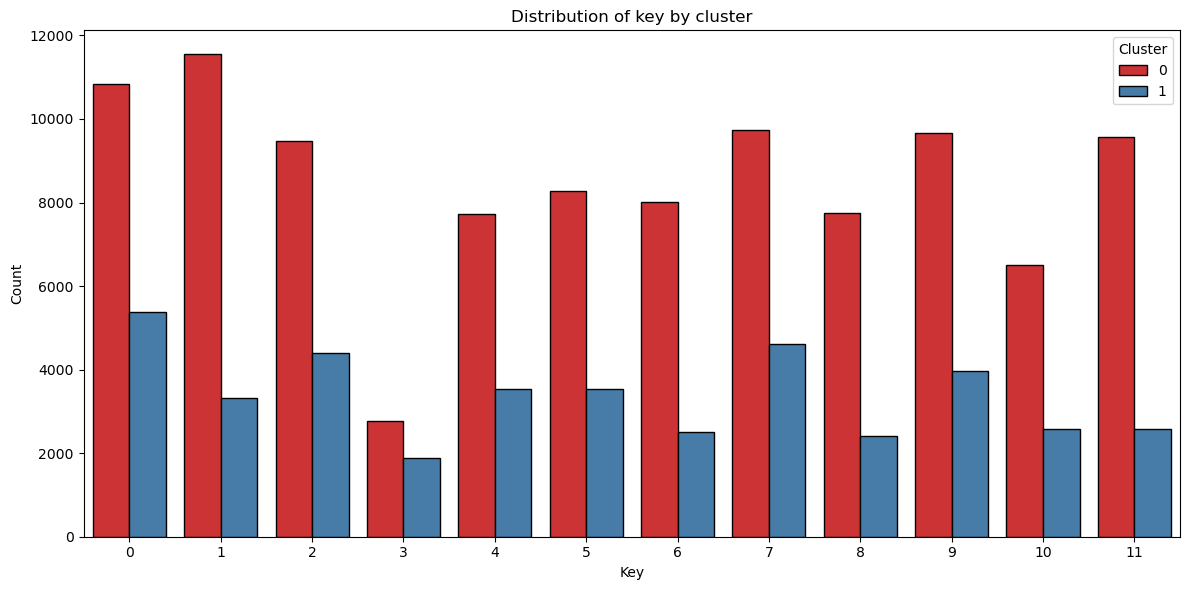

Cross-tabulation of key and MBTI types:
MBTI  ENFJ  ENFP  ENTJ  ENTP  ESFJ  ESFP  ESTJ  ESTP  INFJ  INFP  INTJ  INTP  \
key                                                                            
0     1329  1329   912   992   479   898   464  1186  1413  1445  1183  1049   
1     1056  1206  1079  1066   358   839   491  1304  1076  1259  1134   971   
2     1083  1128   827   880   364   733   422   967  1183  1196  1080   963   
3      382   351   236   264   113   225   134   340   434   443   362   324   
4      858   919   681   704   285   584   339   869   880   994   862   792   
5      997  1000   660   724   353   646   354   885   995   999   870   775   
6      808   878   625   619   252   601   339   886   822   896   759   713   
7     1148  1186   824   917   417   835   410  1148  1157  1158  1069   965   
8      781   791   708   651   265   536   354   882   772   821   779   675   
9     1096  1154   743   810   350   727   422  1065  1123  1184  1041   960   


In [33]:
# distribution analysis of key features
# i will analyze and visualize how key preferences vary across MBTI types and clusters below:

# distribution of keys by cluster
plt.figure(figsize=(12, 6))
sns.countplot(x='key', hue='cluster', data=data, palette='Set1', edgecolor='black')
plt.title('Distribution of key by cluster')
plt.xlabel('Key')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# cross-tabulation for statistical analysis
key_table = pd.crosstab(data['key'], data['MBTI'])
print('Cross-tabulation of key and MBTI types:')
print(key_table)